### <p style="text-align: right;"> &#9989; Put your name here</p>

# Day 17 Pre-Class Assignment: Regression
<br/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" alt="Regression" width=500px/>


## Goals for today's pre-class assignment

* Learn a bit about regression
* Perform linear regression "by hand"
* Use NumPy & SciPy Python functions to fit data

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

---
## Part 1: What is Regression?

One of the problems that arises in data science is that the data is invariably imperfect. We often say that the data has "noise" or "fluctuations". The problem is that we know that the fluctuations are not real: they are caused by errors in our measurements or any other factor that is not in our control. We do not want to take those fluctuations literally. In fact, in some cases the fluctuations might actually be real, but we don't want to focus our attention on those details because we simply want the trend. Regression solves this problem by providing a methodology to find a smoother function that is consistent with your data but doesn't attempt to match every detail, which you may not believe is real. 

Most of the most common forms of regression is called **linear regression**. Linear regression finds the best line that goes through noisy data. But, there are other forms of regression that we will be interested in. Here are some of the methods we will explore in this class:

* linear regression: fitting a best-fit line through a data set
* fitting polynomials: rather than assuming a line, which has the form $mx+b$, we might assume some other polynomial, such as $ax^2 + mx + b$
* curve fitting: we might want to fit to some other curve, which you need to supply based on some insight into the data, of arbitrary form; for example, the exponential $a\exp(-t)+ b$
* autoregression: this uses the concept of a lag plot to generate future information based on past information

For this assignment, we will explore the first three, and we will do autoregression later in the week. For now, watch this video on regression and its use in data analysis.


#### Watch this video


In [ ]:
from IPython.display import YouTubeVideo  
YouTubeVideo("DFNzRRPjWWk",width=640,height=360)

----
## Part 2: Doing Regression "By Hand"

Time to practice using regression to fit a function to some data. The next video covers an example of fitting a simple linear regression model "by hand" - calculating the slope and intercept values given some data. 


#### Watch this video

In [ ]:
from IPython.display import YouTubeVideo  
YouTubeVideo("1YUHyBTztOc",width=640,height=360)

____
Using what was covered in the previous video, follow along with the code below where we will use ordinary least squares (OLS) solutions to fitting a simple linear regression model. 

First we can make our necessary imports and then generate some data to work with!

In [9]:
# Import our necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

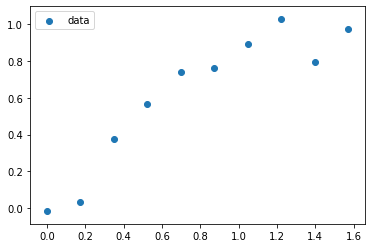

In [10]:
# create some x data points from 0 to π/2
x = np.linspace(0,np.pi/2,10)

# create some y data using sin(x) -- we add some "randomness" to the data using np.random.randn(10)
y = np.sin(x) + 0.1*np.random.randn(10)

# plot our data
plt.scatter(x, y, label = "data")
plt.legend()
plt.show()

Look at the plot above. Notice that the relationship between $y$ and $x$ is roughly linear. This means we can use the ordinary least squares (OLS) approach to fit a line to the data. Below is a function that performs OLS.

The equations for linear regression are at in the video, but are repeated here as a reference:

$$\bar{x} = \frac{1}{N}\sum_i x_i$$

$$\bar{y} = \frac{1}{N}\sum_i y_i$$

$$ m = \frac{\sum_i x_i y_i - N\bar{x}\bar{y}}{\sum_i x_i^2 - N\bar{x}^2}$$

$$ b = \bar{y} - m\bar{x}$$

Recall that:
* $x_i$ are the $x$ coordinates, and there are $N$ of them
* $y_i$ are the $y$ values of the data, and there are also $N$ of them
* the sums, $\sum_i$, means that you sum up all of the values that follow; for example, $\sum_ix_i = x_0 + x_1 + \cdots x_{N-1}$

**In the function below, comment the code where specified and fill in the equation for calculating $b$, the intercept!**

In [14]:
# This function is used to calculate ordinary least squares regression parameters given some data

def my_ols_parameters(x, y):
    
    # average of x data
    mean_x = np.mean(x)
    
    # average of y data
    mean_y = np.mean(y)
    
    # number of data points we have -- len(y) would work too
    N = len(x)
    
    # the sum of all the x multiplied by all the y
    xy_product_sum = np.sum(x*y)
    
    # the sum of all the x squared
    xx_product_sum = np.sum(x**2)
    
    
    # what is this line doing?
    # comment here
    m = (xy_product_sum - N * mean_x * mean_y)/(xx_product_sum - N*mean_x**2)

    # UNCOMMENT AND FILL IN THIS CODE
    # calculate the intercept using the equation above
    b = 
    
    # what does this function return?
    # comment here
    return m, b

The function provided below (no changes to this function are needed) takes in our $x$ data and our estimated slope and intercept values to predict expected $y$ values. We will use this function below when we plot our fitted linear regression model!

In [15]:
# THIS FUNCTION IS PROVIDED, NO CHANGES NECESSARY
# This function uses a regression equation to predict y given x
# It takes in b (the intercept), m (the coefficient), and
# x (the independent data)

def my_ols_regression(x, m, b):
    
    expected_y = m*x + b
    
    return expected_y

In the cell below, we call our finished `my_ols_parameters` function to calculate our parameters and then feed these into our `my_ols_regression` function to calculate our expected $y$ values. Comment the code below where specified!

In [16]:
# comment here - what is m & b?
m_expected, b_expected = my_ols_parameters(x, y)

# comment here - what are these values?
expected_y = my_ols_regression(x, m_expected, b_expected)

# plot our data against our fitted linear regression
plt.scatter(x, y, label = "data")
plt.plot(x, expected_y, color = "orange", label = "fit")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

NameError: name 'b' is not defined

Print out your calculated slope and intercept below. What do these values mean in terms of $x$ and $y$?

In [ ]:
# Put your code here


***Record your thoughts here!***

----
## Part 3: Regression using `np.polyfit` and `np.poly1d`

Now that we have practiced regression by hand, we can take a look at how Python makes fitting a regression model to some data a lot easier! NumPy provides us with a couple of functions that can take data and fit a linear regression model to it (links are provided to the documentation):

* [`np.polyfit`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html])
* [`np.poly1d`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.poly1d.html)

Fitting regression models with your own written functions can be a pain when there is a lot of data or you have a complicated function. NumPy makes this process very fast and efficient. Watch the video below for a quick tutorial! Note the similarities between `np.polyfit`/`np.poly1d` and our `my_ols_parameters`/`my_ols_regression` functions above.

#### Watch this video

In [ ]:
from IPython.display import YouTubeVideo  
YouTubeVideo("WUIMxqrPcDE",width=640,height=360)

____
Let's work through a couple of examples of `np.polyfit` and `np.poly1d` using the $x$ and $y$ data from the above exercise. First, let's quickly do a first-order linear regression like we did above! How do these calculated parameter values compare to when we calculated them "by hand" above?

In [17]:
parameters = np.polyfit(x, y, 1)

print(parameters)

[0.64364092 0.11041431]


***Put your answer here!***

Instead of doing a simple first-order (linear) regression, let's use `np.polyfit` to fit a simple second-order (quadratic) regression to our $x$ and $y$ data. **You will need to fill in the some of the code below.**

In [ ]:
# use np.polyfit to get the parameters for our polynomial regression
poly_parameters = np.polyfit(x, y, 2)

# uncomment this code and pass in the parameters array to np.poly1d to create a regression function
#my_poly_function = ?

# initialize our predicted y values from the my_poly_function created using np.poly1d
expected_y_poly = my_poly_function(x)

# plot our data against our fitted function
plt.scatter(x, y, label = "data")
plt.plot(x, expected_y_poly, color = "orange", label = "fit")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

----
## Part 4: Fitting a function using `curve_fit`

What if we want to fit a different type of function than a polynomial to our data? Maybe instead of our data having a linear relationship, like $y = mx + b$, the data is sinusoidal or exponential. NumPy's `polyfit` and `poly1d` can't fit non-linear functions like these. Luckily for us, the SciPy library provides us with a function that can: [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). **You do not need to code anything yourself for this tutorial - just follow along with the code and answer a couple of questions about what is happening!**

In [23]:
# import curve_fit function
from scipy.optimize import curve_fit

SciPy's `curve_fit` function takes in three arguments: a function that we define in Python, our $x$ data, and our $y$ data. It then returns an array of parameters that our defined function uses. 

Let's take a look at the example in the cell below. Run the cell and see that our data follows a sinusoidal relationship.

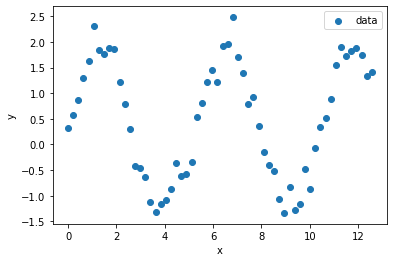

In [24]:
# generate some x data: sixty data points from 0 to 4π
x_sin = np.linspace(0,4*np.pi,60)

# generate some y data: 1.5 * sin(1.2x + 0.5)
# we add the np.random.normal(1, .35, 60) at the end to add some randomness to the data
y_sin = 1.5 * np.sin(1.2 * x_sin) + np.random.normal(.25,.25,60)

# plot our data
plt.scatter(x_sin, y_sin, label = "data")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Because this is just simulated data, we know that our "signal" is a sinusoid that has the relationship $y = 1.5 * sin(1.2x)$. A typical sin curve model is $y = A * sin(Bx + C)$. This means our true parameter values are:

* $A = 1.5$
* $B = 1.2$
* $C = 0$

However, we usually don't know the values of these parameters - that's why we use regression & curve fitting! We define our sin function below for `curve_fit`

In [25]:
def my_sin_function(x, A, B, C):
    
    return A * np.sin(B * x + C)

Next we can run `curve_fit` in the cell below now that we have our function defined and our data. `curve_fit` returns two values: the first is an array of our parameter values. In this example, the array will be $[A, B, C]$.

Print out the fitted and expected paramter values from `curve_fit`. Are they close to our true values?

In [26]:
# Use curve_fit by passing in the sin function, x data, and y data
popt, pcov = curve_fit(my_sin_function, x_sin, y_sin)

# Print the array of fitted parameter values
print(popt)

[ 1.64738092  1.20173623 -0.01267907]


*Are the fitted parameters close to our true values? **Put your answer here!***

We can now unpack our parameter values and use them in our sin function to get our expected $y$ values. Once we have our fitted curve, we can plot it against the data below!

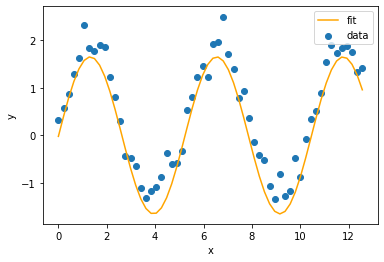

In [27]:
a_expected = popt[0]  # get fitted A value
b_expected = popt[1]  # get fitted B value
c_expected = popt[2]  # get fitted C value

# use my_sin_function with new parameters to get expected y values
y_sin_expected = my_sin_function(x_sin, a_expected, b_expected, c_expected)


# plot our actual data
plt.scatter(x_sin, y_sin, label = "data")

# plot our fitted curve
plt.plot(x_sin, y_sin_expected, color = "orange", label = "fit")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Is the fitted sin function from `curve_fit` a "good fit" for our data?

***Record your thoughts here***

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse801-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees